In [4]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt


In [5]:
cases = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_cases.csv', index_col=0)
product = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_product.csv', index_col=0)
dim_customer = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_info.csv', index_col=0)

# Generate more users:
- Generate customers in customer_cases
- Add the new customers to dim_customer and generate age, gender, 
- Add customer to products - Add created date. + Generate new cancelation month (after created date)


In [20]:
def add_random_days(date):
    n = np.random.uniform(30,365)
    new_date = date + timedelta(days=n)
    if (new_date.month==1) | (new_date.month==12):
        new_date = new_date + timedelta(days=n*2)
    else:
        pass

    return new_date


In [28]:
sample_size = 200000

gen_cases = pd.DataFrame({
    'case_id' :  np.array(pd.Series(np.repeat("CC", sample_size)) + pd.Series(np.arange(330613, 330613+sample_size)).astype(str)),
    'date_time' : cases['date_time'].sample(sample_size, replace = True).to_numpy(),
    'customer_id' : np.array(pd.Series(np.repeat("C", sample_size)) + pd.Series(np.arange(511380, 511380+sample_size)).astype(str)),
    'channel' : cases['channel'].sample(sample_size, replace = True).to_numpy(),
    'reason' : cases['reason'].sample(sample_size, replace = True).to_numpy(),
    })

gen_cases['date_time'] = pd.to_datetime(gen_cases['date_time'])


gen_cases


,case_id,date_time,customer_id,channel,reason
0,CC330613,2021-02-23 16:06:15,C511380,phone,support
1,CC330614,2021-10-04 12:20:31,C511381,phone,support
2,CC330615,2018-06-04 13:01:16,C511382,phone,signup
3,CC330616,2020-12-18 13:36:24,C511383,phone,signup
4,CC330617,2020-06-22 13:26:23,C511384,phone,support
...,...,...,...,...,...
199995,CC530608,2021-06-18 12:25:17,C711375,phone,support
199996,CC530609,2018-04-19 16:00:08,C711376,phone,signup
199997,CC530610,2021-08-14 17:19:39,C711377,phone,support
199998,CC530611,2021-05-05 17:14:31,C711378,phone,signup


In [43]:
#gcase_id = 
mini_df = gen_cases[gen_cases['date_time'].dt.month <= 5]
mini_df
#gen_prod['cancel_date_time'] = gen_prod['cancel_date_time'].apply(lambda x: add_random_days(x))




,case_id,date_time,customer_id,channel,reason
0,CC330613,2021-02-23 16:06:15,C511380,phone,support
5,CC330618,2018-02-14 15:56:05,C511385,phone,signup
9,CC330622,2020-05-27 11:15:41,C511389,phone,support
11,CC330624,2021-03-08 12:34:17,C511391,phone,support
15,CC330628,2021-05-07 12:26:27,C511395,phone,support
...,...,...,...,...,...
199986,CC530599,2021-04-05 09:38:38,C711366,phone,support
199989,CC530602,2020-02-18 12:59:32,C711369,phone,support
199994,CC530607,2021-03-22 10:45:31,C711374,phone,support
199996,CC530609,2018-04-19 16:00:08,C711376,phone,signup


In [8]:
gen_cust = pd.DataFrame({
    'customer_id' : np.array(pd.Series(np.repeat("C", sample_size)) + pd.Series(np.arange(511380, 511380+sample_size)).astype(str)),
    'age' : dim_customer['age'].sample(sample_size, replace = True).to_numpy(),
    'gender' : dim_customer['gender'].sample(sample_size, replace = True).to_numpy(),
    })

gen_cust

,customer_id,age,gender
0,C511380,58,female
1,C511381,56,male
2,C511382,58,female
3,C511383,56,female
4,C511384,59,female
...,...,...,...
199995,C711375,59,male
199996,C711376,57,male
199997,C711377,61,male
199998,C711378,70,female


In [23]:
gen_prod = gen_cases[['customer_id', 'date_time']].copy()

gen_prod['product'] = product['product'].sample(sample_size, replace = True).to_numpy()

gen_prod = gen_prod[['customer_id', 'product', 'date_time']].copy()

gen_prod['date_time'] = pd.to_datetime(gen_prod['date_time']) 

gen_prod['cancel_date_time'] = gen_prod['date_time']

gen_prod['cancel_date_time'] = gen_prod['cancel_date_time'].apply(lambda x: add_random_days(x))

gen_prod = gen_prod.rename(columns={'date_time': 'signup_date_time'})

gen_prod

,customer_id,product,signup_date_time,cancel_date_time
0,C511380,prd_2,2019-12-10 14:05:22,2020-03-26 15:32:04.379089
1,C511381,prd_1,2019-05-16 10:42:26,2019-09-21 04:17:01.594633
2,C511382,prd_1,2017-11-24 17:09:44,2018-06-04 02:07:56.588497
3,C511383,prd_1,2021-02-15 13:30:37,2021-06-26 13:31:09.756493
4,C511384,prd_2,2018-07-02 12:37:40,2019-06-02 09:17:36.838912
...,...,...,...,...
199995,C711375,prd_2,2019-09-23 15:33:49,2020-08-23 00:42:06.247790
199996,C711376,prd_1,2020-10-19 10:15:47,2021-04-15 11:04:07.532113
199997,C711377,prd_2,2019-10-03 11:13:04,2020-06-13 20:24:06.685914
199998,C711378,prd_1,2021-06-26 11:28:03,2022-04-29 07:14:24.424742


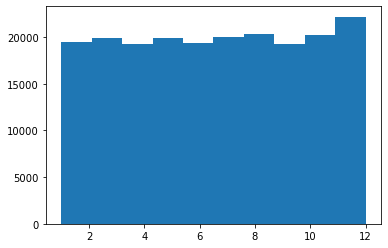

In [24]:
plt.hist(pd.DatetimeIndex(gen_prod['cancel_date_time'] ).month)
plt.show()

# Merge original and generated data

In [10]:
new_cases = pd.concat([cases,gen_cases], ignore_index=True)
new_product = pd.concat([product,gen_prod], ignore_index=True)
new_dim_customer = pd.concat([dim_customer, gen_cust], ignore_index=True)

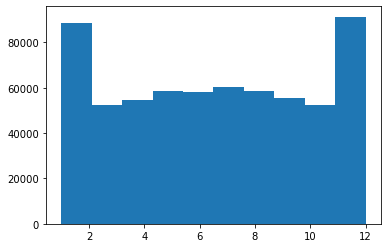

In [13]:
plt.hist(pd.DatetimeIndex(new_cases.date_time).month)
plt.show()

# Save new data

In [147]:
new_cases.to_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_cases.csv', index=False, encoding='utf-8', sep=',')
new_product.to_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_product.csv', index=False, encoding='utf-8', sep=',')
new_dim_customer.to_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_info.csv', index=False, encoding='utf-8', sep=',')